# Disease Condition prediction based on drug reviews

#### In this project, we will classify the condition of patients using the reviews of the drugs given by patients using drug reviews dataset available in UCI ML Repository.

## Importing libraries

In [1]:
import pandas as pd # for data preprocessing
import itertools # for plotting confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Data

In [2]:
df = pd.read_csv('drugsComTrain_raw.csv')
df.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [3]:
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [4]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [5]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [6]:
df.shape

(161297, 7)

In [7]:
df_train.shape

(42732, 7)

In [8]:
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

## EDA 

#### for visualizing and understanding the most frequent words in a corpus, which can be helpful for qualitative analysis and gaining insights into the content of the text data.

In [9]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: count, dtype: int64

In [10]:
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

In [11]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

In [13]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----

Text(0.5, 1.0, 'Word cloud for Birth control')

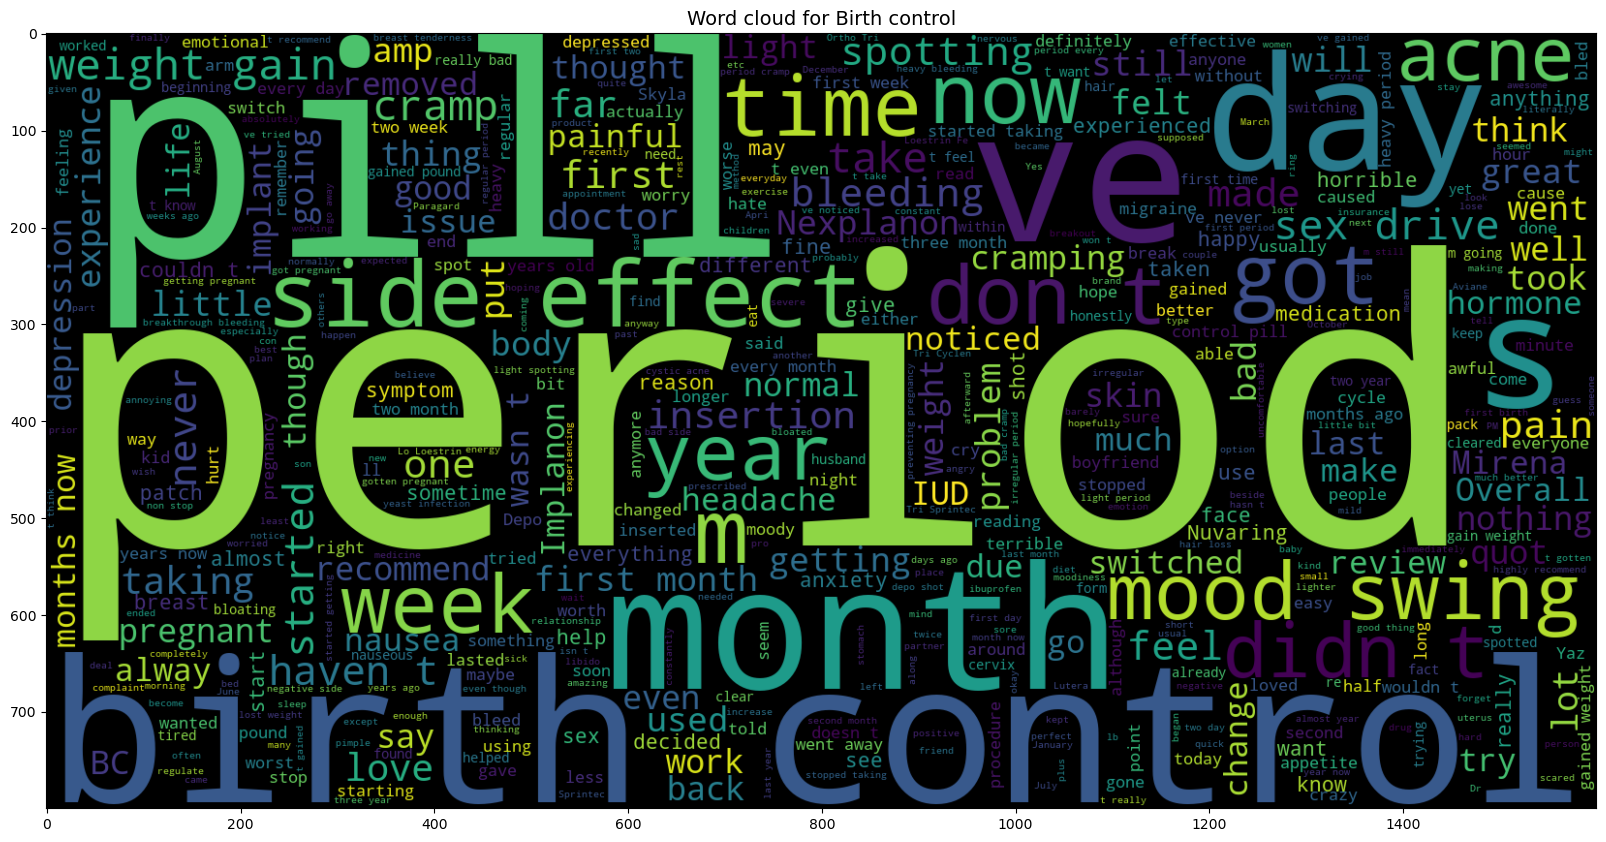

In [14]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

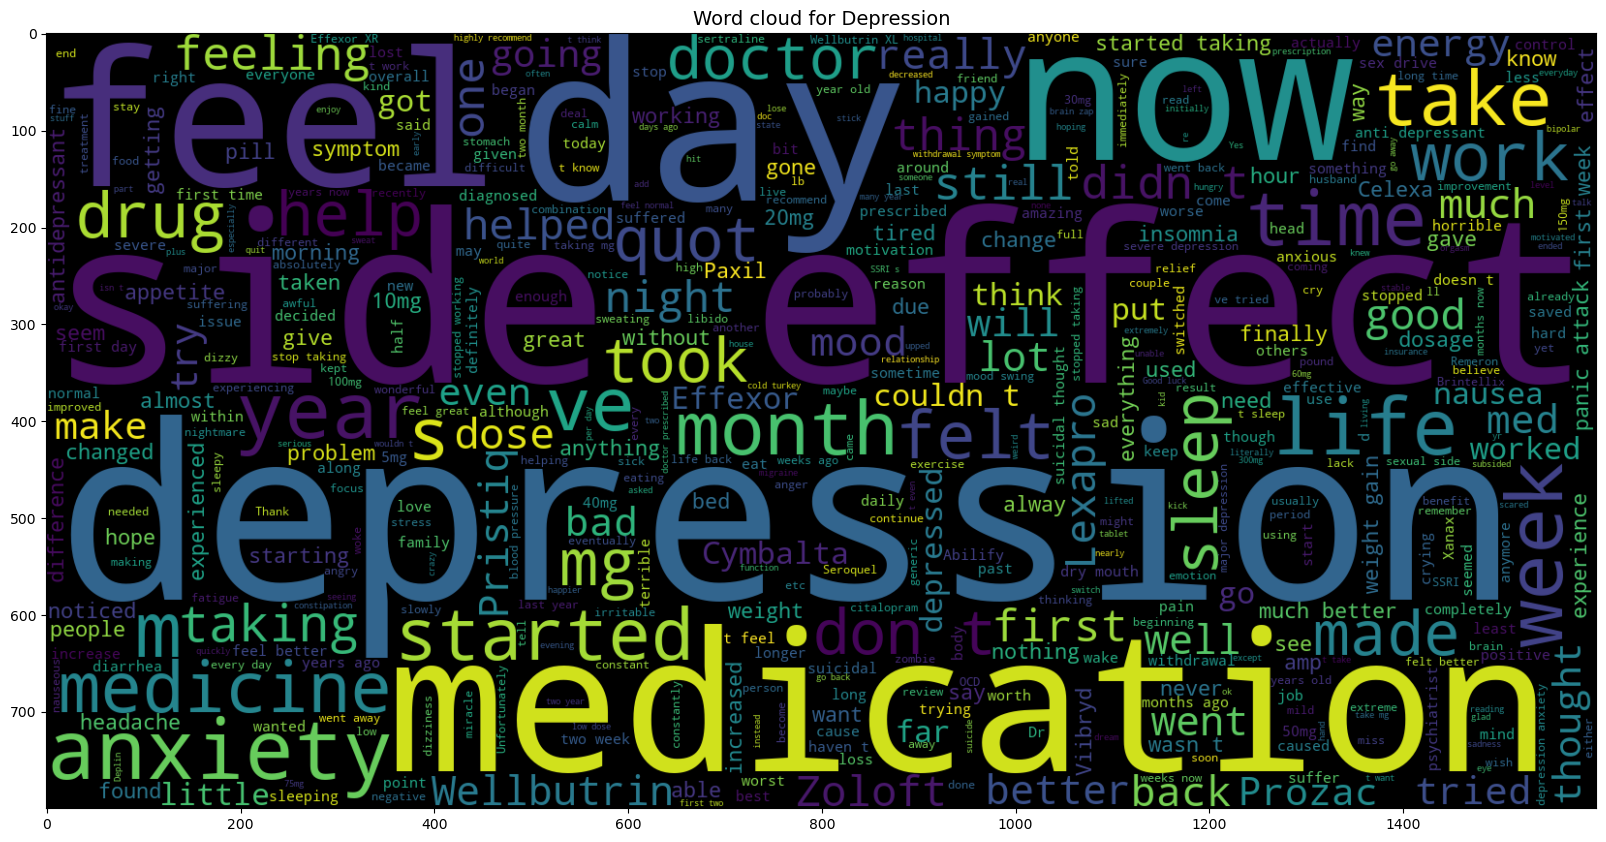

In [15]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

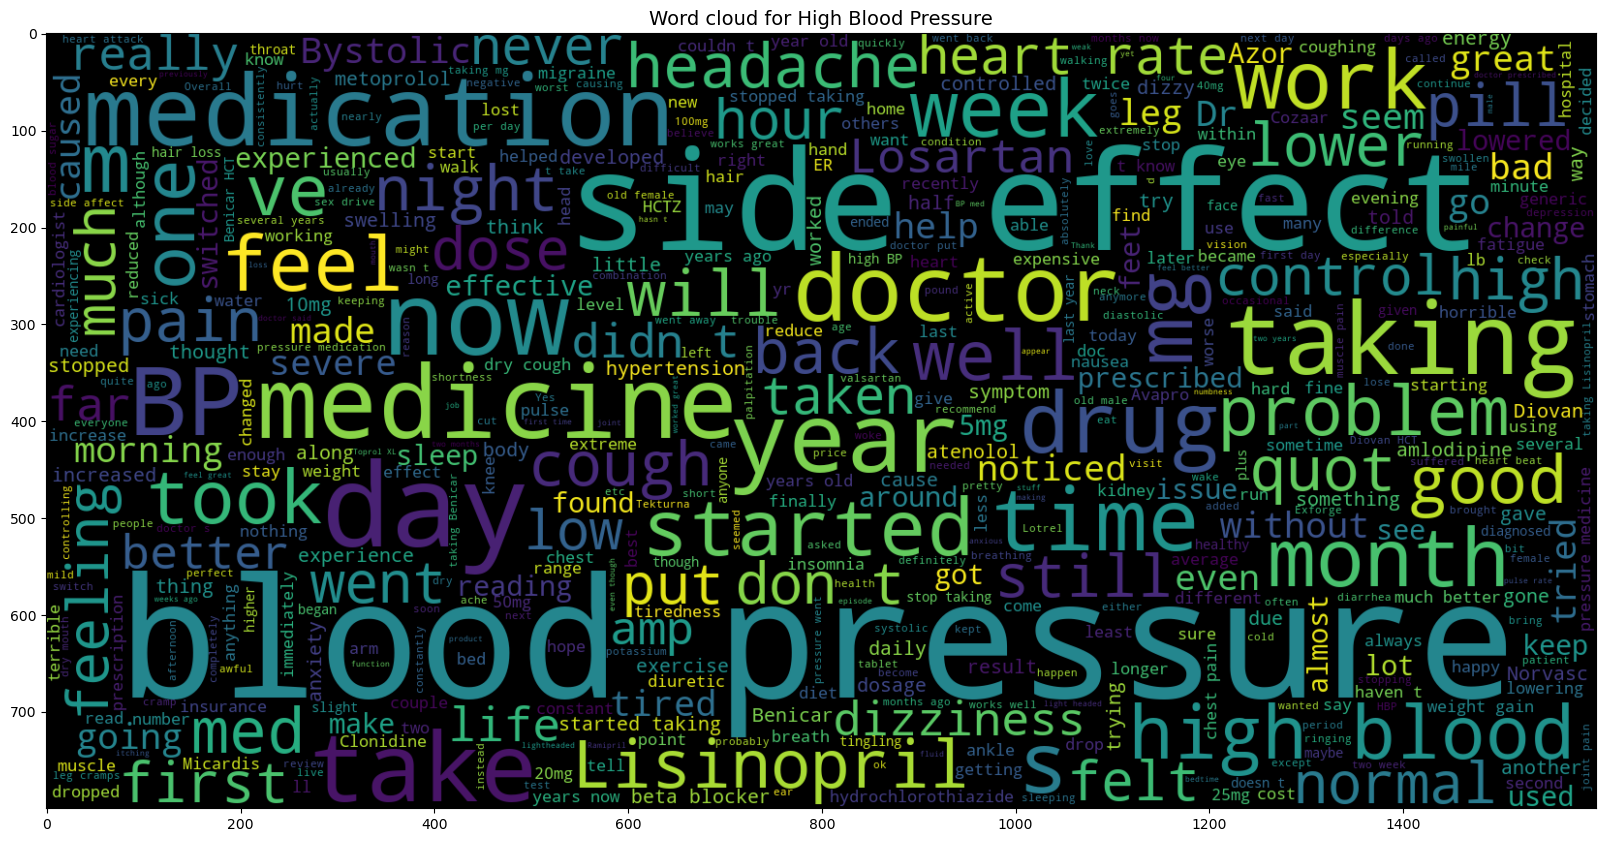

In [16]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

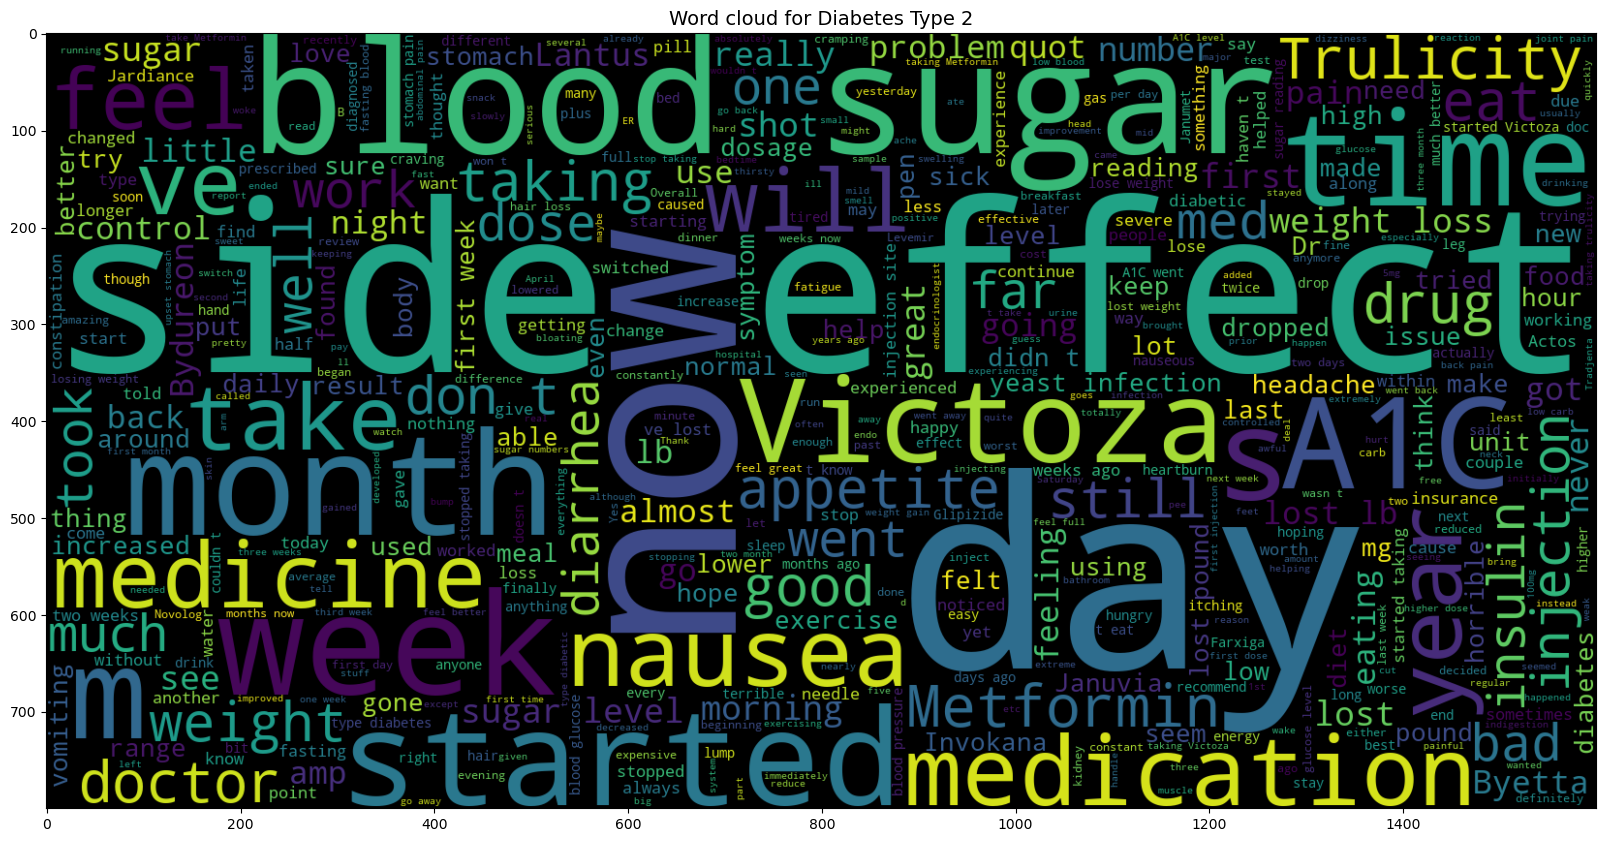

In [17]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)

In [24]:
# nltk.download("stopwords", download_dir="C:\\Users\\Ashraf\\anaconda3\\nltk_data")
# nltk.download('punkt', download_dir="C:\\Users\\Ashraf\\anaconda3\\nltk_data")
# nltk.download('wordnet', download_dir="C:\\Users\\Ashraf\\anaconda3\\nltk_data")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashraf\anaconda3\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Data Preprocessing

#### Removing any double quotes (") with an empty string for each element in that column using the str.replace method.

In [18]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [20]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', 999)

In [21]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
2                                  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.  
3                                                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch  
9                                                      I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.  
11                                                                                                                                                                                                                                                                                                                                  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now an

#### Removing Stop Words such as "the","is","in","for","where","when","to", "at" etc.

In [22]:
from nltk.corpus import stopwords

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')  # Remove double quotes
    X.iloc[:, i] = X.iloc[:, i].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))  # Remove stop words

In [27]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              review  
2                 used take another oral contraceptive, 21 pill cycle, happy- light periods, max 5 days, side effects. contained hormone gestodene, available US, switched Lybrel, ingredients similar. pills ended, started Lybrel immediately, first day period, instructions said. period lasted two weeks. taking second pack- two weeks. now, third pack things got even worse- third period lasted two weeks it&#039;s end third week- still daily brown discharge. positive side didn&#039;t side effects. idea period free tempting... Alas.  
3                                                                                                                                                                                                                                                                    first time using form birth control. I&#039;m glad went patch, 8 months. first decreased libido subsided. downside made periods longer (5-6 days exact) used periods 3-4 days max also made cramps intense first two days period, never cramps using birth control. happy patch  
9                   pill many years. doctor changed RX chateal, effective. really help completely clearing acne, takes 6 months though. gain extra weight, develop emotional health issues. stopped taking bc started using natural method birth control, started take bc hate acne came back age 28. really hope symptoms like depression, weight gain begin affect older now. I&#039;m also naturally moody, may worsen things. negative mental rut today. Also hope doesn&#039;t push edge, believe depressed. Hopefully it&#039;ll like younger.  
11                                                                                                                                                                                                                     taken anti-depressants years, improvement mostly moderate severe side affects, makes go them. take Cymbalta mostly pain. began Deplin, noticed major improvement overnight. energy, better disposition, sinking low lows major depression. taking 3 months feel like normal person first time ever. Best thing, side effects.  
14  Started Nexplanon 2 months ago minimal amount contraception&#039;s take due inability take hormone used birth controls. I&#039;m trying give time one options right now. honestly options I&#039;d get removed. I&#039;ve never acne problems life, immediately broke getting implanted. Sex drive completely gone, used sex boyfriend days week, completely forced even fun anymore. mean I&#039;m birth control like sex don&#039;t want get pregnant, take birth control takes away sex? unhappy hope get back time I&#039;m getting removed.

#### Lemmitization

In [33]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

    # 2. Remove Non-Alphabetic Characters
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)

    # 3. Lowercase Letters
    words = word_tokenize(letters_only.lower())

    # 5. Remove Stopwords
    meaningful_words = [w for w in words if not w in stop_words]

    # 6. Lemmatization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]

    # 7. Join Words
    return ' '.join(lemmitize_words)

In [37]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\Ashraf\AppData\Local\Temp\ipykernel_10728\349416894.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [38]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              review  \
2                 used take another oral contraceptive, 21 pill cycle, happy- light periods, max 5 days, side effects. contained hormone gestodene, available US, switched Lybrel, ingredients similar. pills ended, started Lybrel immediately, first day period, instructions said. period lasted two weeks. taking second pack- two weeks. now, third pack things got even worse- third period lasted two weeks it&#039;s end third week- still daily brown discharge. positive side didn&#039;t side effects. idea period free tempting... Alas.   
3                                                                                                                                                                                                                                                                    first time using form birth control. I&#039;m glad went patch, 8 months. first decreased libido subsided. downside made periods longer (5-6 days exact) used periods 3-4 days max also made cramps intense first two days period, never cramps using birth control. happy patch   
9                   pill many years. doctor changed RX chateal, effective. really help completely clearing acne, takes 6 months though. gain extra weight, develop emotional health issues. stopped taking bc started using natural method birth control, started take bc hate acne came back age 28. really hope symptoms like depression, weight gain begin affect older now. I&#039;m also naturally moody, may worsen things. negative mental rut today. Also hope doesn&#039;t push edge, believe depressed. Hopefully it&#039;ll like younger.   
11                                                                                                                                                                                                                     taken anti-depressants years, improvement mostly moderate severe side affects, makes go them. take Cymbalta mostly pain. began Deplin, noticed major improvement overnight. energy, better disposition, sinking low lows major depression. taking 3 months feel like normal person first time ever. Best thing, side effects.   
14  Started Nexplanon 2 months ago minimal amount contraception&#039;s take due inability take hormone used birth controls. I&#039;m trying give time one options right now. honestly options I&#039;d get removed. I&#039;ve never acne problems life, immediately broke getting implanted. Sex drive completely gone, used sex boyfriend days week, completely forced even fun anymore. mean I&#039;m birth control like sex don&#039;t want get pregnant, take birth control takes away sex? unhappy hope get back time I&#039;m getting removed.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                       review_clean  
2      used take another oral contraceptive pill cycle happy light period max day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel immediately fir

## Creating features and Target Variable

In [39]:
X_feat=X['review_clean']
y=X['condition']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Bag of Words

In [43]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [44]:
count_train

<34185x15995 sparse matrix of type '<class 'numpy.int64'>'
	with 1093000 stored elements in Compressed Sparse Row format>

In [49]:
count_test

<8547x15995 sparse matrix of type '<class 'numpy.int64'>'
	with 272302 stored elements in Compressed Sparse Row format>

# Machine Learning Model : Naive Bayes

In [50]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)

MultinomialNB()

In [51]:
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.970


Confusion matrix, without normalization


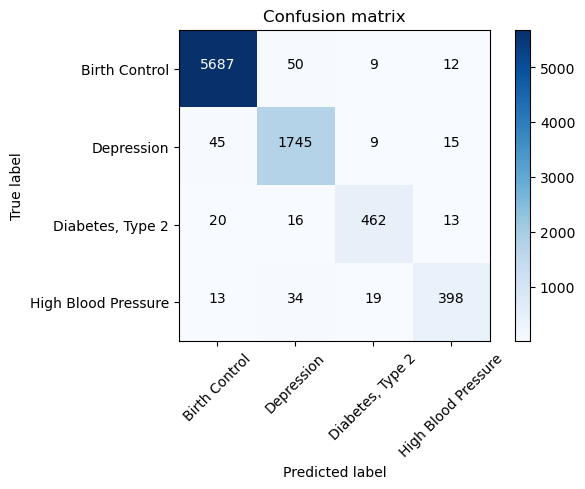

In [52]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# Machine Learning Model : Passive Aggressive Classifier

In [53]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)

PassiveAggressiveClassifier()

In [54]:
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.977


Confusion matrix, without normalization


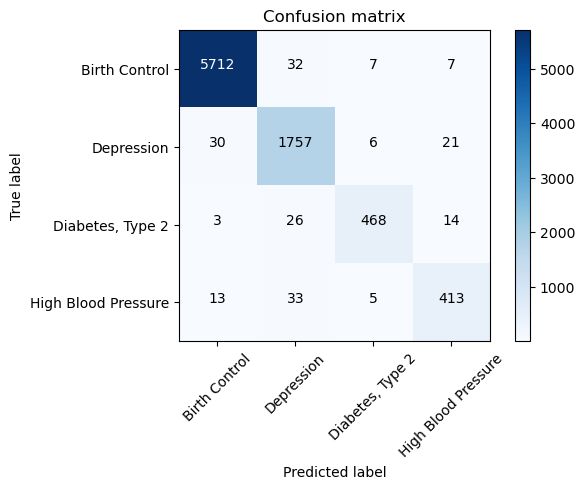

In [55]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## TF_IDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Machine Learning Model : Naive Bayes

In [58]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train, y_train)

MultinomialNB()

In [59]:
pred = mnb_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.921


Confusion matrix, without normalization


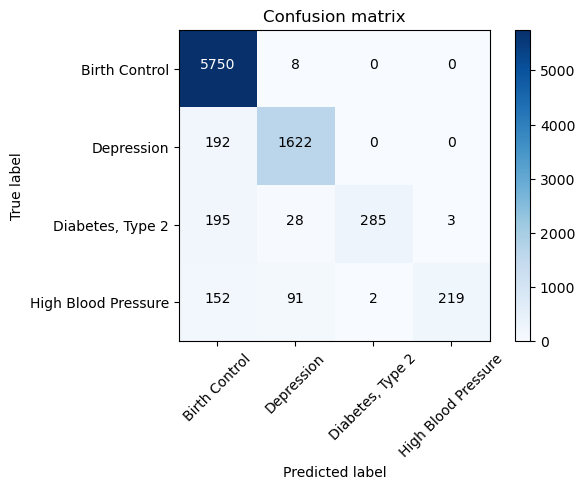

In [60]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# Machine Learning Model : Passive Aggressive Classifier 

## TF_IDF

In [61]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier()

In [62]:
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.982


Confusion matrix, without normalization


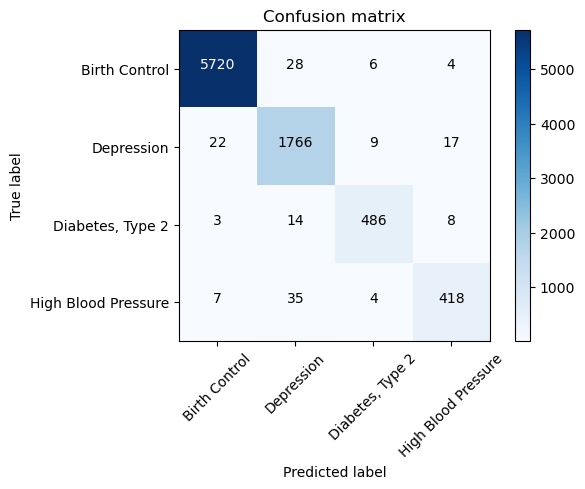

In [63]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## TF_IDF: Bigrams

In [64]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

In [65]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)

PassiveAggressiveClassifier()

In [66]:
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.986


Confusion matrix, without normalization


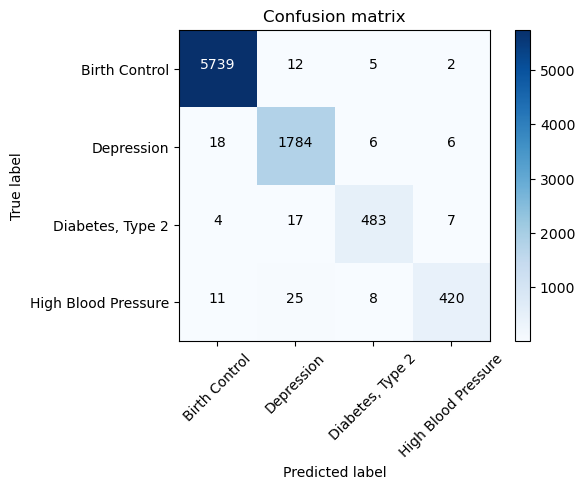

In [67]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## TF_IDF : Trigrams

In [68]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

In [69]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)

PassiveAggressiveClassifier()

In [70]:
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.986


Confusion matrix, without normalization


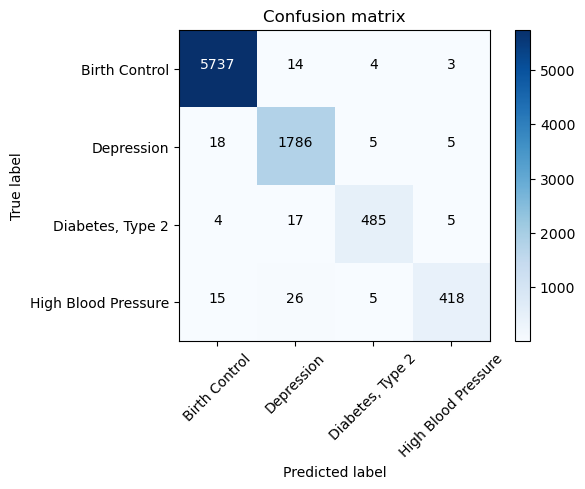

In [71]:
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

# Sample Predictions

In [74]:
X.tail()

condition  \
161273        Birth Control   
161278     Diabetes, Type 2   
161286           Depression   
161290  High Blood Pressure   
161291        Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                          review  \
161273  Nexplanon since Dec. 27, 2016 got first period end January lasted month half. March 2017 didn&#039;t bleed close three weeks started bleeding March 28th bleeding every since. gained 13 lbs far since getting birth control. Although weight gain isn&#039;t deal breaker bleeding is.. trying patient see body adjusts implant. three months far fingers crossed cycle go away awhile.   
161278                                                                                                                                                                                                                              got diagnosed type 2. doctor prescribed Invokana metformin beginning. sugars went normal second week. losing much weight. side effects yet. Miracle medicine   
161286                                                                                                                                                                                                                                                third med I&#039;ve tried anxiety mild depression. week hate much. dizzy, major diarrhea feel worse started. Contacting doc changing asap.   
161290                                                                                       Tekturna 9 days. effect immediate. also calcium channel blocker (Tiazac) hydrochlorothiazide. put Tekturna palpitations experienced Diovan (ugly drug opinion, company produces however). palpitations pretty bad Diovan, 24 hour monitor EKG etc. days substituting Tekturna Diovan, palpitations.   
161291                                                                                                     would second month Junel. I&#039;ve Birth Control 10 years now. changed due spotting increased mood swings previous birth control. Since switch shorter periods 2-3 days, gained major weight increased appetite. switched regular exercise routine still managed drop extra 7 lbs ;(   

                                                                                                                                                                                                                                                                                                                           review_clean  
161273  nexplanon since dec got first period end january lasted month half march bleed close three week started bleeding march th bleeding every since gained lb far since getting birth control although weight gain deal breaker bleeding trying patient see body adjusts implant three month far finger crossed cycle go away awhile  
161278                                                                                                                                                                              got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine  
161286                                                                                                                                                                                                      third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap  
161290                                                      tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced

In [76]:
text =["Nexplanon since Dec. 27, 2016 got first period end January lasted month half. March 2017 didn&#039;t bleed close three weeks started bleeding March 28th bleeding every since. gained 13 lbs far since getting birth control. Although weight gain isn&#039;t deal breaker bleeding is.. trying patient see body adjusts implant. three months far fingers crossed cycle go away awhile."]
test = tfidf_vectorizer3.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'Birth Control'

In [78]:
text =["got diagnosed type 2. doctor prescribed Invokana metformin beginning. sugars went normal second week. losing much weight. side effects yet. Miracle medicine"]
test = tfidf_vectorizer3.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'Diabetes, Type 2'

In [80]:
text =["third med I&#039;ve tried anxiety mild depression. week hate much. dizzy, major diarrhea feel worse started. Contacting doc changing asap."]
test = tfidf_vectorizer3.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'Depression'

In [81]:
## Function for Extracting Top drugs
def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst


In [82]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
  ]

In [83]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Birth Control"
        print("text:", text, "\Condition:", target)
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Zoloft
Viibryd

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losi